# Bifurcation diagram of a chaotic dynamical system

Adapted from the Ipython Cookbook.

Here we consider a <em>logistic map</em>, which is an example of chaos arising from a simple nonlinear equation.  
The logistic map models the evolution of a population including reproduction and mortality.

For more information, see Wikipedia articles on 
<a href="https://en.wikipedia.org/wiki/Chaos_theory">chaos theory</a>, 
<a href="https://en.wikipedia.org/wiki/Complex_system">complex systems</a>, 
<a href="https://en.wikipedia.org/wiki/Logistic_map">the logistic map</a>, 
<a href="https://en.wikipedia.org/wiki/Iterated_function">iterated functions</a>,
<a href="https://en.wikipedia.org/wiki/Bifurcation_diagram">bifurcation diagrams</a>.

In [1]:
%matplotlib inline

# standard numpy and matplotlib imports
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def logistic(r, x):
    """Function definition of logistic map.
           f_r(x) = r x(1-x)
    """
    return r*x*(1-x)

def sine_map(r, x):
    return r * np.sin(np.pi * x) 

def sine_map_deriv(r, x):
    return r * np.pi * np.cos(np.pi * x)

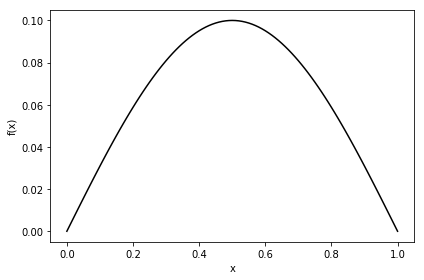

In [3]:
x, step = np.linspace(0., 1., num=101, endpoint=True, retstep=True)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

r_param = 0.1
ax.plot(x, sine_map(r_param, x), color='black')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

fig.tight_layout()

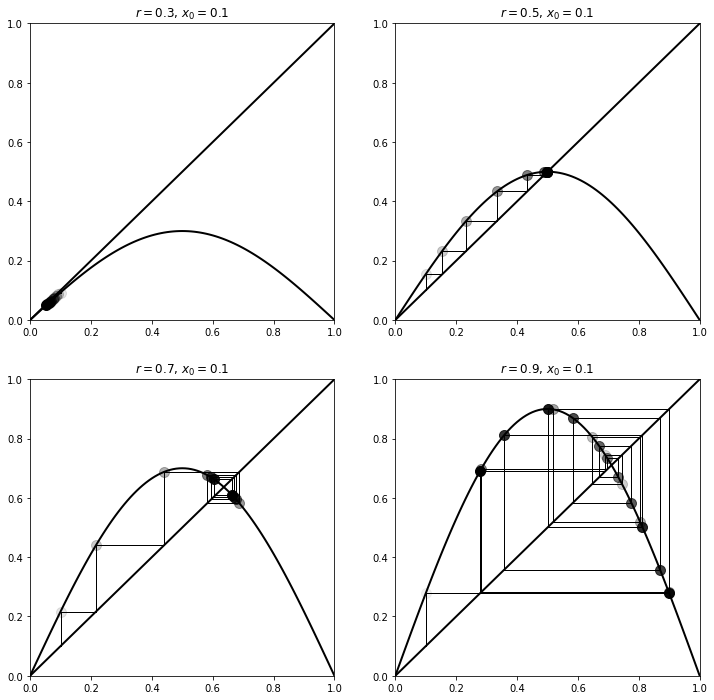

In [4]:
def plot_system(r, x0, n, ax=None):
    """Plot the function and the y=x diagonal line."""
    t = np.linspace(0,1, num=101)
    ax.plot(t, sine_map(r,t), 'k', lw=2)  # black, linewidth 2
    ax.plot([0,1], [0,1], 'k', lw=2)  # x is an array of 0 and 1, 
                                      # y is the same array, so plot 
                                      # from (0,0) to (1,1)
    
    # Recursively apply y=f(x) and plot two lines:
    #   line from (x, x) to (x, y)
    #   line from (x, y) to (y, y)
    x = x0
    for i in range(n):
        y = sine_map(r, x)
        # Plot the two lines
        ax.plot([x,x], [x,y], 'k', lw=1)
        ax.plot([x,y], [y,y], 'k', lw=1)
        # Plot the positions with increasing opacity
        ax.plot([x], [y], 'ok', ms=10, alpha=(i+1)/n)
        x=y  # recursive: reset x to y
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")
                
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
plot_system(.3, 0.1, 10, ax=ax1)  # start at 0.1, r parameter is 2.5, take n steps
# or fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharey=True)
ax2 = fig.add_subplot(2,2,2)
plot_system(.5, 0.1, 10, ax=ax2)
ax3 = fig.add_subplot(2,2,3)
plot_system(.7, 0.1, 10, ax=ax3)
ax4 = fig.add_subplot(2,2,4)
plot_system(.9, 0.1, 20, ax=ax4)

In [5]:
n = 10000   
r = np.linspace(0.6, 1.0, n)  # n values of r linearly spaced 

iterations = 1000   # iterations of the map; keep last iterations
last = 100

x = 0.1 * np.ones(n)  # x_0 initial condition

lyapunov = np.zeros(n) # initialize vector for lyapunov exponents

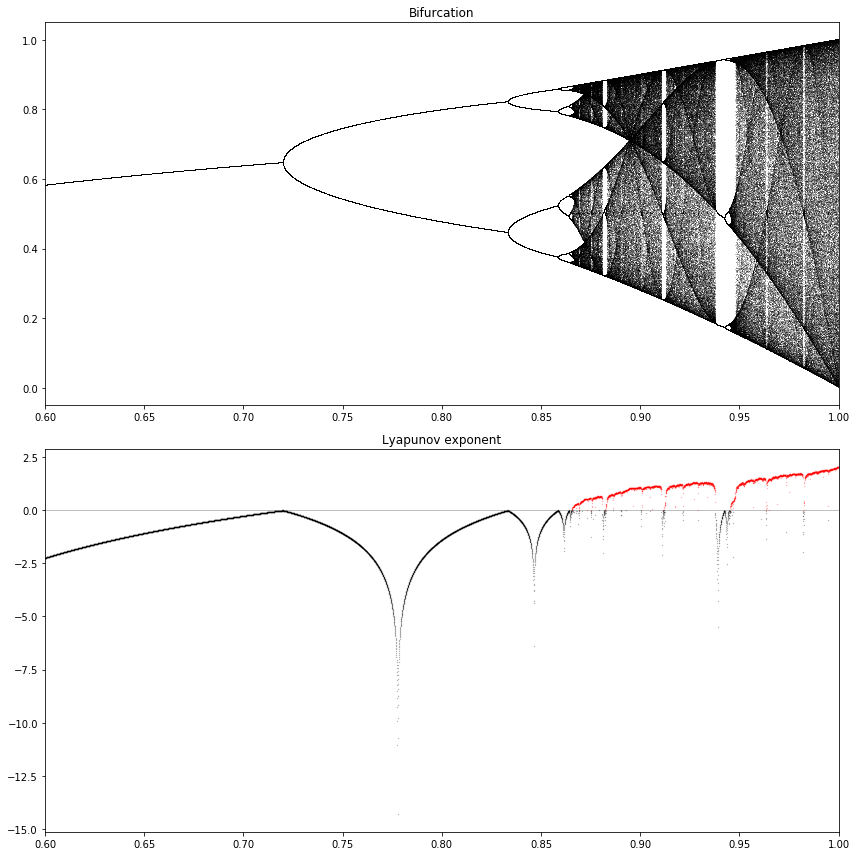

In [8]:
# Display the bifurcation diagram with one pixel per point x_n^(r) for last iterations
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

for i in range(iterations):
    x = sine_map(r,x)
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(sine_map_deriv(r,x)))
    # Display the bifurcation diagram.
    if i >= (iterations-last):
        ax1.plot(r, x, ',k', alpha=0.25)
ax1.set_xlim(0.6, 1.)
ax1.set_title("Bifurcation")

# Display the Lyapunov exponent
# Add a zero line (lightened with alpha=0.5)
ax2.axhline(0, color='k', lw=0.5, alpha=0.5)
# Negative Lyapunov exponent
ax2.plot(r[lyapunov < 0], 
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=0.5, ms=0.5)
# Positive Lyapunov exponent
ax2.plot(r[lyapunov >= 0], 
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=0.5, ms=0.5)

ax2.set_xlim(0.6, 1.)
#ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")

plt.tight_layout()

We see there is a fixed point for $r < 3$, then two and four equilibria and a chaotic behavior when $r$ belongs to certain areas of the parameter space.

The Lyapunov exponent is positive when the system is chaotic (in red).